In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from io import StringIO

from datetime import datetime
import matplotlib.dates as mdates
from scipy.ndimage.filters import gaussian_filter1d

#Import relevant NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#Download relevant data files
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
nltk.download('punkt')
nltk.download('wordnet')

listingData = pd.read_csv('listings.csv')
calendarData = pd.read_csv('calendar.csv')
reviewData = pd.read_csv('reviews.csv')

ModuleNotFoundError: No module named 'nltk'

### Neighbourhood with most AirBnb 
#### Bar Graph Representation

In [2]:
#Author: Lim Jia En
#Identifying neighbourhood with the most Airbnb.
plt.figure(figsize=(20,15))
chart = sb.countplot(
    data=listingData,
    x='neighbourhood_cleansed',
    palette='Set1'
)

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium',

)

NameError: name 'listingData' is not defined

<Figure size 1440x1080 with 0 Axes>

Based on the graph as represented, our team has identified the top 3 neighbourhood with the most Airbnb are:
- Broadway
- Belltown
- Wallingford

Our team will conduct an exploratory analysis and using boxplot to represent our findings of the three different neighbourhood we had shortlisted. 

The purpose of doing so is that areas with many Airbnb will surface issues on interested applicant for booking, these issue can be as such, different applicant have different needs/budgets. 

We will attempt to shortlist the data of the top 3 neighbourhood to allow interested applicant to know the market rate of the neighbourhood that they in when booking Airbnb.

This data will also in turn benefit those who are keen or new to joining Airbnb business in the neighbourhood and set their charges on rental appropriately.

### Summary Information
#### Top 3 location with the most number Airbnb

In [3]:
#Author: Lim Jia En
#The dataset for Top 3 Area with the most Airbnb.
#Helping Users to sort out the mean, most and least expensive of the Airbnb if they are price-oriented.

#Data for Broadway AirBnb

data_1 = pd.read_csv('broadwayprice.csv')
broadway_prices = data_1['price']

# Minimum price of the data
minimum_price = np.amin(broadway_prices)

# Maximum price of the data
maximum_price = np.amax(broadway_prices)

# Mean price of the data
mean_price = np.mean(broadway_prices)

# Standard deviation of prices of the data
std_price = np.std(broadway_prices)

# Show the calculated statistics
print("Statistics for Broadway housing dataset:\n")
print("Minimum price: ${}".format(round(minimum_price, 2))) 
print("Maximum price: ${}".format(round(maximum_price, 2)))
print("Mean price: ${}".format(round(mean_price, 2)))
print("Standard deviation of prices: ${}".format(round(std_price, 2)))

print("----------------------------------------")

#Data for Belltown AirBnb

data_2 = pd.read_csv('belltownprice.csv')
belltown_prices = data_2['price']

# Minimum price of the data
minimum_price = np.amin(belltown_prices)

# Maximum price of the data
maximum_price = np.amax(belltown_prices)

# Mean price of the data
mean_price = np.mean(belltown_prices)

# Standard deviation of prices of the data
std_price = np.std(belltown_prices)

print("Statistics for Belltown housing dataset:\n")
print("Minimum price: ${}".format(round(minimum_price, 2))) 
print("Maximum price: ${}".format(round(maximum_price, 2)))
print("Mean price: ${}".format(round(mean_price, 2)))
print("Standard deviation of prices: ${}".format(round(std_price, 2)))

print("----------------------------------------")

#Data for Wallingford AirBnb

data_3 = pd.read_csv('wallingford.csv')
wallingford_prices = data_3['price']

# Minimum price of the data
minimum_price = np.amin(wallingford_prices)

# Maximum price of the data
maximum_price = np.amax(wallingford_prices)

# Mean price of the data
mean_price = np.mean(wallingford_prices)

# Standard deviation of prices of the data
std_price = np.std(wallingford_prices)

print("Statistics for Wallingford housing dataset:\n")
print("Minimum price: ${}".format(round(minimum_price, 2))) 
print("Maximum price: ${}".format(round(maximum_price, 2)))
print("Mean price: ${}".format(round(mean_price, 2)))
print("Standard deviation of prices: ${}".format(round(std_price, 2)))

Statistics for Broadway housing dataset:

Minimum price: $25.0
Maximum price: $673.0
Mean price: $123.89
Standard deviation of prices: $77.53
----------------------------------------
Statistics for Belltown housing dataset:

Minimum price: $35.0
Maximum price: $999.0
Mean price: $162.89
Standard deviation of prices: $110.29
----------------------------------------
Statistics for Wallingford housing dataset:

Minimum price: $39.0
Maximum price: $680.0
Mean price: $128.43
Standard deviation of prices: $98.76


/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Boxplot for Broadway

#### Reflects the distribution of the rental prices in Broadway

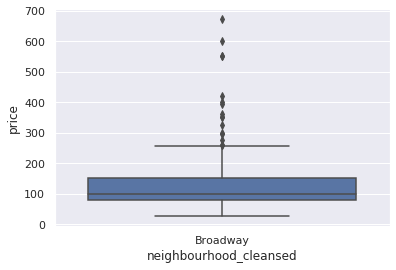

In [4]:
#Author: Lim Jia En

sorted_nb = data_1.groupby(['neighbourhood_cleansed'])['price'].median().sort_values()
sb.boxplot(x=data_1['neighbourhood_cleansed'], y=data_1['price'], order=list(sorted_nb.index), orient = "v")

### Boxplot for Belltown

#### Reflects the distribution of the rental prices in Belltown

In [5]:
#Author: Lim Jia En

sorted_nb = data_2.groupby(['neighbourhood_cleansed'])['price'].median().sort_values()
sb.boxplot(x=data_2['neighbourhood_cleansed'], y=data_2['price'], order=list(sorted_nb.index))

KeyError: 'neighbourhood_cleansed'

### Boxplot for Wallingford

#### Reflects the distribution of the rental prices in Wallingford

In [6]:
#Author: Lim Jia En

sorted_nb = data_3.groupby(['neighbourhood_cleansed'])['price'].median().sort_values()
sb.boxplot(x=data_3['neighbourhood_cleansed'], y=data_3['price'], order=list(sorted_nb.index))

KeyError: 'neighbourhood_cleansed'

### Seasonal Trend 
#### Any Trend in Housing & Occupancy?

In [ ]:
#Author: Lim Jia En

def timeplot(data, feat, title):
    
    plt.figure(figsize=(18,8))
    
    x = [datetime.strptime(date, '%Y-%m-%d') for date in data.index]
    y = data[feat]
    
    y_smooth = gaussian_filter1d(y, sigma=5)
    
    # set x tick by month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.title(title)
    plt.plot(x, y_smooth, 'c-')
    plt.show()

In [ ]:
#Author: Lim Jia En
calendarData['available'].value_counts()

In [ ]:
#Author: Lim Jia En
#convert 'available' into binary (Replacing the T with 1 and F with 2) changing into numeric so system is able to read.
calendarData['available'] = calendarData['available'].map(lambda available: 1 if available == 't' else 0)

In [ ]:
#Author: Lim Jia En
#check if the above code works and did what is intended or not
calendarData['available'].value_counts()

In [ ]:
#Author: Lim Jia En
occupancy = calendarData[['date', 'available']].groupby('date').mean()
occupancy['occupancy'] = 1 - occupancy['available']

In [ ]:
#Author: Lim Jia En
timeplot(occupancy, 'occupancy', 'Occupancy Rate by Date')

With reference from the graph, the month of Jan, 2016 has the highest number of occupancy rate and the lowest being Jan 2017. This might come across as conflicting as people viewing the data might think the trend in Jan, 2016 to be reciprocated on Jan, 2017 as well.

From our research, we had found that during Jan, 2016, there was a NFL (National FootBall League) matchup with Seattle, SeaHawks against the Vikings at a staidum in Seattle . There could be this possibility that hardcore fan from both teams came to Seattle to watch the game and therefore booked an Airbnb. This may be the reason why Jan, 2017 does not have the same occupancy rate as Jan, 2016 due to the fact that maybe during Jan, 2017 there wasn't any event or major games held like the NFL.

Apart from that, we can also see that during the season/month of Spring and Summer, the occupancy rate increases and creating a good business for the Airbnb Host. As an Airbnb Host, the critical period where you can earn the most money would be the season of Spring and Summer as Seattle is very popular during these periods.

As for the Winter period, the occupancy rate for AirBnb as many do not wish to go on a holiday during this period. 

After knowing all this, it would make sense for us to check if the correlation of the occupancy rate affects the rental price. It is for us to see if Airbnb host are actually aware of this phenomenom and uses it to their advantage.

### Trend of the Data
#### Between the Occupancy Rate & Prices of AirBnb

In [ ]:
#Author: Lim Jia En
# making 'price' datatype as float
calendarData['price'] = calendarData['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')

In [ ]:
#Author: Lim Jia En
pri_median = calendarData[['date', 'price']].groupby('date').median()

In [ ]:
#Author: Lim Jia En
timeplot(pri_median, 'price', 'Median Price by Date')
timeplot(occupancy, 'occupancy', 'Occupancy Rate by Date')

From the graph, we can see that there is a correlation between the price and the occupancy rate.

Comparing the two graph, top graph (Median Price) and bottom graph (Occupancy Rate), we can see that the median price of the rental increases when the occupancy rate is peaking.

This also shows that during a good season such as spring and summer, the Airbnb host uses this opportunity to increase their price as many holiday goers have their holiday at such seasons. And when the season are bad such as winter, the Airbnb will lower the prices of the Airbnb to attract customers to come forward.

### Popular AirBnb and Unpopular Airbnb Comparison
#### Is there a feature/good points we can spot in Popular Airbnb in contrast to Unpopular Airbnb?

In [ ]:
#Author: Lim Jia En
occupy = calendarData[['listing_id', 'available']].groupby('listing_id').mean()
occupy['occupancy'] = 1 - occupy['available']
occupy.drop(['available'], axis = 1, inplace=True)
occupy['id'] = occupy.index

In [ ]:
#Author: Lim Jia En
occupy.head()

In [ ]:
#Author: Lim Jia En
occupy.describe()

In [ ]:
#Author: Lim Jia En

plt.figure(figsize=(9,7))
sb.distplot(occupy['occupancy'], color='g', kde=False)
plt.show()

In [ ]:
#Author: Lim Jia En

data = pd.merge(occupy, listingData, how='inner', left_on='id', right_on='id')

In [ ]:
#Author: Lim Jia En

threshold = 0.6

def comparisonPlot(feat):

    plt.figure(figsize=(8,6))
        
    # if not float, draw bar plot
    if data[feat].dtype != np.float:
        # build a tempary DataFrame for using seaborn easily
        # includes 3 columns: occupancy, popularity and index
        cnt_popular = data[data['occupancy'] >= threshold][feat].value_counts()
        cnt_unpopular = data[data['occupancy'] < threshold][feat].value_counts()
        fre_popular = pd.DataFrame(cnt_popular / sum(cnt_popular))
        fre_popular['popularity'] = 'Popular'
        fre_popular['index'] = fre_popular.index
        fre_unpopular = pd.DataFrame(cnt_unpopular / sum(cnt_unpopular))
        fre_unpopular['popularity'] = 'Unpopular'
        fre_unpopular['index'] = fre_unpopular.index
        
        plot_data = pd.concat([fre_popular, fre_unpopular], ignore_index=True)
        sb.barplot(x='index', y=feat, hue='popularity', data=plot_data, palette='BrBG_r')
        plt.xticks(rotation='vertical')
        plt.legend(loc=1)
    
    # if float, draw kde line
    else:
        sb.kdeplot(data[feat][data['occupancy'] >= threshold], color='m')
        sb.kdeplot(data[feat][data['occupancy'] < threshold], color='c')
        plt.legend(['Popular', 'Unpopular'], loc=1)
    
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    
    plt.show()

### Popular AirBnb and Unpopular Airbnb Comparison 
#### Host Response Time

In [ ]:
#Author: Lim Jia En
# host response time
comparisonPlot('host_response_time')

From the graph, many people tends to make pre-booking when the Airbnb host replies very promptly.

Airbnb Host replies speed is one of the variable that affects the booking rate of the Airbnb. This data is also very important to Airbnb host as it can allow the host to see a trend and pattern if they want their Airbnb to be rented out and earn some money.

### Popular AirBnb and Unpopular Airbnb Comparison 
#### Neighbourhood

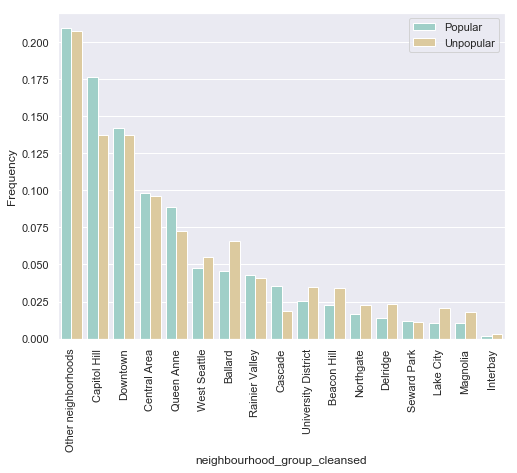

In [20]:
#Author: Lim Jia En
# neighbourhood
comparisonPlot('neighbourhood_group_cleansed')

From what we can from the graph, we can see that the most popular AirBnb spot that people actually booked are from the neighbourhood of Capitol Hill.

There could be a reason why Capitol and Downtown are significantly higher than the rest of the neighbourhood as Capitol Hill, Seattle and Downtown, Seattle are home to many tourist that are visiting with many entertainment outlet as compared to maybe Lake City, Seattle as Lake City is a small town with schools and housing lodge only. There is nothing much as Lake City therefore from the graph the frequency is much lower.

Not to be confused by the Bar Graph representation previously (Comparing which neighbourhood has the most no. of AirBnb), the graph represents the frequency of the booking, in other words, more people tends to stay/want to book.


### Popular AirBnb and Unpopular Airbnb Comparison
#### Instant Bookings

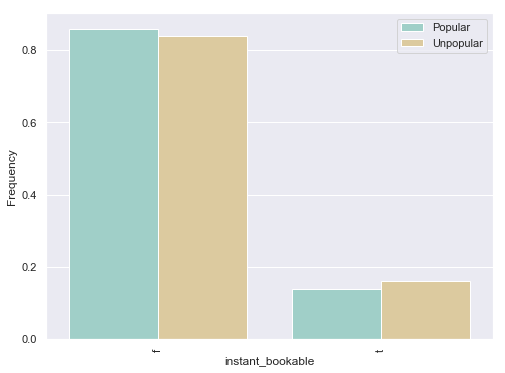

In [21]:
#Author: Lim Jia En
# booking
comparisonPlot('instant_bookable')

From the graph it actually does not matter if the room can be instantly book. Looking at the graph favoring more towards the 'False' Parameter with popular and unpopular very close to each other.

### Popular AirBnb and Unpopular Airbnb Comparison 
#### Property Type

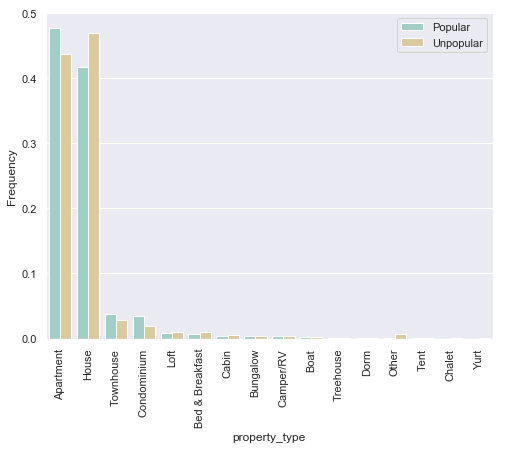

In [22]:
#Author: Lim Jia En
# property type
comparisonPlot('property_type')

Many people prefer to book their Airbnb with an apartment setting or house setting. We can see that settings such as townhouse/condomunium and loft are quite unpopular. 

In addition, comparing the data for house and apartment, we can also infer that the mass majority of people booking airbnb prefer Apartment Type as compared to House Type.

### Popular AirBnb and Unpopular Airbnb Comparison
#### Cancellation Policy

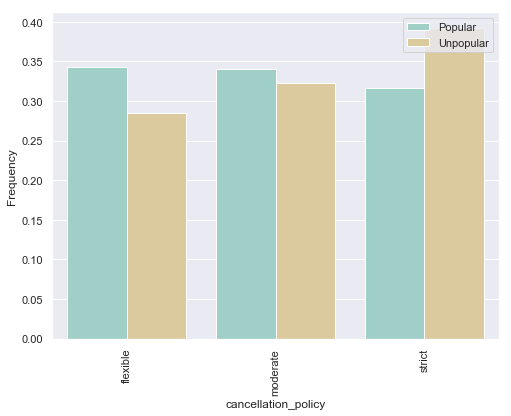

In [23]:
#Author: Lim Jia En
# cancellation policy
comparisonPlot('cancellation_policy')

We can see from the graph that if the AirBnb Host adopt a more flexible cancellation policy, the frequency of the people engaging them are much higher as compared to host adopting a moderate or strict cancellation policy.

With reference from the graph, the more popular option of Airbnb are the one with more flexible cancellation policy.

In [ ]:
#Author: GUPTA SUHANA 
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Sea|born style for graphics

listingData = pd.read_csv('listings.csv')
calendarData = pd.read_csv('calendar.csv')
reviewData = pd.read_csv('reviews.csv')

In [ ]:
#Author: GUPTA SUHANA 
calendarData['available'] = calendarData['available'].map(lambda available: 1 if available == 't' else 0)
occupy = calendarData[['listing_id', 'available']].groupby('listing_id').mean()
occupy['occupancy'] =  1 - occupy['available']
occupy = occupy.reset_index()

In [ ]:
#Author: GUPTA SUHANA 
reviewScore = listingData[['id', 'review_scores_rating']].groupby('id').mean()
reviewScore = reviewScore.reset_index()

In [ ]:
#Author: GUPTA SUHANA 
popularity = pd.merge(occupy, reviewScore, left_on='listing_id', right_on='id')

In [ ]:
#Author: GUPTA SUHANA 
testing_id_equal_to_listing_id = popularity['id'] == popularity['listing_id']
testing_id_equal_to_listing_id.value_counts()

In [ ]:
#Author: GUPTA SUHANA 
del popularity['id']

In [ ]:
#Author: GUPTA SUHANA 
a = ((popularity['occupancy'] >= 0.6))
b = (popularity['review_scores_rating'] >= 90.0)
popularity['popular'] = (a & b)

In [ ]:
#Author: GUPTA SUHANA 
popularity

In [ ]:
#Author: GUPTA SUHANA 
#LOOKING AT HOST RESPONSE TIME

In [ ]:
#Author: GUPTA SUHANA 
listingData['host_response_code'] = pd.Categorical(listingData['host_response_time'])
listingData['host_response_code'] = listingData['host_response_code'].cat.codes
pd.Categorical(listingData['host_response_time'])
#codes: {-1:'NaN' 0: 'a few days or more', 1: within a day, 2: 'within a few hours' , 3: 'within an hour'}

In [ ]:
#Author: GUPTA SUHANA 
host_response_data = listingData[['id', 'host_response_code']].groupby('id').mean().reset_index()

In [ ]:
#Author: GUPTA SUHANA 
host_response_data['popular'] = popularity['popular']

In [ ]:
#Author: GUPTA SUHANA 
host_code_to_popular_ct = host_response_data[['host_response_code', 'popular']].groupby('host_response_code').sum().reset_index()

In [ ]:
#Author: GUPTA SUHANA 
#We see fairly good correlation between higher response codes (meaning faster responses) to popularity rates ~ 0.81
host_code_to_popular_ct.corr()

In [ ]:
#Author: GUPTA SUHANA 
sb.heatmap(host_code_to_popular_ct.corr(), annot=True)

In [ ]:
#Author: GUPTA SUHANA 
#LOOKING AT NEIGHBORHOOD 

In [ ]:
#Author: GUPTA SUHANA 
listingData['neighborhood_code'] = pd.Categorical(listingData['neighbourhood_cleansed'])
listingData['neighborhood_code'] = listingData['neighborhood_code'].cat.codes
pd.Categorical(listingData['neighbourhood_cleansed'])

In [ ]:
#Author: GUPTA SUHANA 
neighborhood_data = listingData[['id', 'neighborhood_code']].groupby('id').sum().reset_index()

In [ ]:
#Author: GUPTA SUHANA 
neighborhood_data['popular'] = popularity['popular']

In [ ]:
#Author: GUPTA SUHANA 
nbr_code_to_popular_ct = neighborhood_data[['neighborhood_code', 'popular']].groupby('neighborhood_code').sum().reset_index()
nbr_code_to_popular_ct = nbr_code_to_popular_ct.sort_values(by=['popular'], ascending=False)
nbr_code_to_popular_ct.head()

In [ ]:
#Author: GUPTA SUHANA 
#We can now see the top 5 neighborhoods had the highest # of popular airbnbs
for elem in nbr_code_to_popular_ct['neighborhood_code'].head():
    print(listingData.loc[listingData['neighborhood_code'] == elem]['neighbourhood_cleansed'].iloc[0])

In [ ]:
#Author: GUPTA SUHANA 
#LOOKING AT INSTANT BOOKABILITY

In [ ]:
#Author: GUPTA SUHANA 
listingData['instant_bookable'] = listingData['instant_bookable'].map(lambda book: 1 if book == 't' else 0)

In [ ]:
#Author: GUPTA SUHANA 
bookability_data = listingData[['id', 'instant_bookable']].groupby('id').sum().reset_index()
bookability_data['popular'] = popularity['popular']

In [ ]:
#Author: GUPTA SUHANA 
book_ct_per_code = bookability_data[['instant_bookable', 'popular']].groupby('instant_bookable').sum().reset_index()

In [ ]:
#Author: GUPTA SUHANA 
#We see a direct (-1) negative correlation between instant bookability and popularity. This directly makes sense because
#those that are instantly bookable, likely have little to no demand, meaning high availibility and thus low popularity
#by our calculations. 
book_ct_per_code.corr()

In [ ]:
#Author: GUPTA SUHANA 
sb.heatmap(book_ct_per_code.corr(), annot=True)

In [ ]:
#Author: GUPTA SUHANA 
#LOOKING AT PROPERTY TYPE

In [ ]:
#Author: GUPTA SUHANA 
listingData['property_code'] = pd.Categorical(listingData['property_type'])
listingData['property_code'] = listingData['property_code'].cat.codes
pd.Categorical(listingData['property_type'])

In [ ]:
#Author: GUPTA SUHANA 
property_data = listingData[['id', 'property_code']].groupby('id').sum().reset_index()

In [ ]:
#Author: GUPTA SUHANA 
property_data['popular'] = popularity['popular']

In [ ]:
#Author: GUPTA SUHANA 
prop_code_to_popular_ct = property_data[['property_code', 'popular']].groupby('property_code').sum().reset_index()
prop_code_to_popular_ct = prop_code_to_popular_ct.sort_values(by=['popular'], ascending=False)

In [ ]:
#Author: GUPTA SUHANA 
#We can now see the top 5 property types that had the highest # of popular airbnbs
for elem in prop_code_to_popular_ct['property_code'].head():
    print(listingData.loc[listingData['property_code'] == elem]['property_type'].iloc[0])

In [ ]:
#Author: GUPTA SUHANA 
#LOOKING AT CANCELLATION POLICY

In [ ]:
#Author: GUPTA SUHANA 
listingData['cancellation_code'] = pd.Categorical(listingData['cancellation_policy'])
listingData['cancellation_code'] = listingData['cancellation_code'].cat.codes
pd.Categorical(listingData['cancellation_policy'])
#codes: {0: flexible, 1: moderate, 2: strict}

In [ ]:
#Author: GUPTA SUHANA 
cancellation_data = listingData[['id', 'cancellation_code']].groupby('id').mean().reset_index()

In [ ]:
#Author: GUPTA SUHANA 
cancellation_data['popular'] = popularity['popular']

In [ ]:
#Author: GUPTA SUHANA 
can_code_to_popular_ct = cancellation_data[['cancellation_code', 'popular']].groupby('cancellation_code').sum().reset_index()

In [ ]:
#Author: GUPTA SUHANA 
#We see surprisingly good correlation between higher cancellation codes (meaning moderate or strict policies) to popularity 
# ~ 0.74
can_code_to_popular_ct.corr()

In [ ]:
#Author: GUPTA SUHANA 
sb.heatmap(can_code_to_popular_ct.corr(), annot=True)

In [123]:
#Import base libraries
import numpy as np
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

#Import relevant NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#Download relevant data files
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\18moh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\18moh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\18moh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [124]:
#Author: Prashant Mohit
#Check stopwords
print(stop_words)

{'weren', 'am', 'have', 'such', 'ourselves', 'between', 'there', 'how', 'been', 'only', 'won', 'couldn', 'yours', 'wasn', 'had', 'd', 'me', 'should', 'with', "aren't", 'y', "she's", 'hasn', 'who', 'itself', 'them', 'a', 'but', 've', "it's", 'isn', 're', 'below', 'just', 'she', "haven't", 'any', 'you', 'are', "don't", 'shouldn', 't', 'where', "you'll", 'an', 'own', 'no', 'to', 'the', 'in', 'out', 'having', 'most', "hadn't", 'will', 'after', 'don', 'some', 'above', 'by', 'then', 'your', 'ain', 'down', 'be', 'all', "you've", 'from', 'mustn', 'until', 'for', 'more', 'can', "that'll", 'again', 'and', "you'd", 'into', 'doing', "wouldn't", 'whom', 'were', 'myself', 'because', 'about', 'it', 'themselves', 'does', 'needn', 'hadn', 'wouldn', 'that', 'now', 'being', 'll', 'while', 'very', 'my', 'same', 's', "shan't", 'before', 'over', 'yourselves', 'theirs', 'so', 'mightn', "needn't", 'i', 'they', "weren't", 'during', 'here', 'o', 'is', 'off', 'our', "isn't", 'ma', 'other', 'we', 'what', 'nor', "

# Import Data

In [125]:
calendar=pd.read_csv('https://raw.githubusercontent.com/mohitprashant/CZ1015AirbnbDataAnalysis/master/calendar.csv')
listings=pd.read_csv('https://raw.githubusercontent.com/mohitprashant/CZ1015AirbnbDataAnalysis/master/listings.csv')
reviews=pd.read_csv('https://raw.githubusercontent.com/mohitprashant/CZ1015AirbnbDataAnalysis/master/reviews.csv')

## Preprocess Data

### Clean Calendar

In [126]:
#Author: Prashant Mohit
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [127]:
#Author: Prashant Mohit
#Drop all NaN rows
calendar=calendar.dropna()

calendar.reset_index(inplace=True) 
calendar=calendar.drop(columns=['index'])

#Drop available column as it no longer yields information
del calendar['available']

In [128]:
#Author: Prashant Mohit
for i in range(len(calendar)):
  price=calendar.at[i,'price']
  price=price.replace('$','')
  price=price.replace(',','')
  calendar.at[i,'price']=float(price)

calendar.head()

,listing_id,date,price
0,241032,2016-01-04,85
1,241032,2016-01-05,85
2,241032,2016-01-13,85
3,241032,2016-01-14,85
4,241032,2016-01-18,85


### Clean Reviews

In [129]:
#Author: Prashant Mohit
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [130]:
#Author: Prashant Mohit
reviews.dropna()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


In [131]:
#Author: Prashant Mohit
#Lemmatize and normalize comments, remove stopwords

lem=WordNetLemmatizer()

reviews['cleancomments']='*'
reviews['commentlength']=0

for i in range(len(reviews)):
  try:
    tkn=word_tokenize(reviews.at[i,'comments'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    reviews.at[i,'cleancomments']=l2
    reviews.at[i,'commentlength']=len(reviews.at[i,'cleancomments'])
  except TypeError:
    print(i)

11034
15383
15914
16097
27280
29467
30619
31414
35210
37971
40176
41251
47183
61026
61176
64412
71922
76589


In [132]:
#Author: Prashant Mohit
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 8 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
cleancomments    84849 non-null object
commentlength    84849 non-null int64
dtypes: int64(4), object(4)
memory usage: 5.2+ MB


In [133]:
#Author: Prashant Mohit
#Remove rows that could not be cleaned

reviews=reviews.loc[reviews['cleancomments']!='*']

#Reset indices
reviews.reset_index(inplace=True)
reviews=reviews.drop(columns=['index','comments'])


In [134]:
#Author: Prashant Mohit
#Convert dates to year and month paired lists

for i in range(len(reviews)):
  date=reviews.at[i,'date']
  cleandate=[date[0:4],date[5:7]]
  reviews.at[i,'date']=cleandate

reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,cleancomments,commentlength
0,7202016,38917982,"[2015, 07]",28943674,Bianca,"[cute, cozy, place, perfect, location, everyth...",6
1,7202016,39087409,"[2015, 07]",32440555,Frank,"[kelly, great, room, central, location, beauti...",40
2,7202016,39820030,"[2015, 07]",37722850,Ian,"[spacious, apartment, great, neighborhood, kin...",34
3,7202016,40813543,"[2015, 08]",33671805,George,"[close, seattle, center, offer, ballet, theate...",28
4,7202016,41986501,"[2015, 08]",34959538,Ming,"[kelly, great, host, accommodating, great, nei...",27


### Clean Listings

In [135]:
#Author: Prashant Mohit
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [136]:
#Author: Prashant Mohit
#Find how much info each column has

for col in listings.columns:
  print(col)
  print(len(listings[col].unique()))

id
3818
listing_url
3818
scrape_id
1
last_scraped
1
name
3792
summary
3479
space
3120
description
3742
experiences_offered
1
neighborhood_overview
2507
notes
2000
transit
2575
thumbnail_url
3499
medium_url
3499
picture_url
3818
xl_picture_url
3499
host_id
2751
host_url
2751
host_name
1467
host_since
1381
host_location
121
host_about
2012
host_response_time
5
host_response_rate
46
host_acceptance_rate
3
host_is_superhost
3
host_thumbnail_url
2744
host_picture_url
2744
host_neighbourhood
103
host_listings_count
28
host_total_listings_count
28
host_verifications
116
host_has_profile_pic
3
host_identity_verified
3
street
1442
neighbourhood
82
neighbourhood_cleansed
87
neighbourhood_group_cleansed
17
city
7
state
2
zipcode
29
market
1
smart_location
7
country_code
1
country
1
latitude
3818
longitude
3818
is_location_exact
2
property_type
17
room_type
3
accommodates
15
bathrooms
13
bedrooms
9
beds
12
bed_type
5
amenities
3284
square_feet
48
price
273
weekly_price
396
monthly_price
357
securi

In [137]:
#Author: Prashant Mohit
#Missing info

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [138]:
#Drop redundant/unnecessary columns

listings=listings.drop(columns=['zipcode','host_neighbourhood','host_location','cleaning_fee','security_deposit','weekly_price','monthly_price','has_availability','first_review','last_review','square_feet','experiences_offered','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_thumbnail_url','host_picture_url','host_total_listings_count','city','state','street','neighbourhood','market','smart_location','country_code','country','calendar_updated','calendar_last_scraped','requires_license','license','jurisdiction_names',])

In [139]:
#Author: Prashant Mohit
#Convert Dates to year and month paired lists

for i in range(len(listings)):
  try:
    date1=listings.at[i,'host_since']
    cleandate1=[date1[0:4],date1[5:7]]
    listings.at[i,'host_since']=cleandate1
  except TypeError:
    print(i)
    listings.at[i,'host_since']='*'

1297
1419


In [140]:
#Author: Prashant Mohit
#Clean numerical features

#Assign missing variables the feature mean

for i in range(len(listings)):
  try:
    val=listings.at[i,'host_response_rate']
    val=val[0:-1]
    listings.at[i,'host_response_rate']=float(val)
  except:
    print(i)
    listings.at[i,'host_response_rate']='*'

mean=0
count=0
for i in range(len(listings)):
  if(listings.at[i,'host_response_rate']!='*'):
    mean+=listings.at[i,'host_response_rate']
    count+=1
mean=mean//count
for i in range(len(listings)):
  if(listings.at[i,'host_response_rate']=='*'):
    listings.at[i,'host_response_rate']=mean


for i in range(len(listings)):
  try:
    val=listings.at[i,'host_acceptance_rate']
    val=val[0:-1]
    listings.at[i,'host_acceptance_rate']=float(val)
  except:
    print(i)
    listings.at[i,'host_acceptance_rate']='*'

mean=0
count=0
for i in range(len(listings)):
  if(listings.at[i,'host_acceptance_rate']!='*'):
    mean+=listings.at[i,'host_acceptance_rate']
    count+=1
mean=mean//count
for i in range(len(listings)):
  if(listings.at[i,'host_acceptance_rate']=='*'):
    listings.at[i,'host_acceptance_rate']=mean


for i in range(len(listings)):
  try:
    val=listings.at[i,'price']
    val=val[1:]
    if(val[1]==','):
      val=val[0]+val[2:]
    listings.at[i,'price']=float(val)
  except TypeError:
    print(i)
    listings.at[i,'price']='*'

mean=0
count=0
for i in range(len(listings)):
  if(listings.at[i,'price']!='*'):
    mean+=listings.at[i,'price']
    count+=1
mean=mean//count
for i in range(len(listings)):
  if(listings.at[i,'price']=='*'):
    listings.at[i,'price']=mean


for i in range(len(listings)):
  try:
    val=listings.at[i,'extra_people']
    val=val[1:]
    listings.at[i,'extra_people']=float(val)
  except TypeError:
    print(i)
    listings.at[i,'extra_people']='*'

mean=0
count=0
for i in range(len(listings)):
  if(listings.at[i,'extra_people']!='*'):
    mean+=listings.at[i,'extra_people']
    count+=1
mean=mean//count
for i in range(len(listings)):
  if(listings.at[i,'extra_people']=='*'):
    listings.at[i,'extra_people']=mean

3
5
8
18
19
23
24
42
48
52
53
58
60
70
85
87
98
100
114
118
142
146
153
157
173
181
222
223
226
238
250
265
281
283
297
319
344
347
366
373
375
376
383
387
400
417
438
441
443
447
450
455
458
468
472
475
479
482
490
492
495
505
514
527
533
538
544
550
553
554
556
557
559
561
582
593
594
599
607
612
615
640
643
645
651
653
654
660
673
676
678
679
683
700
705
707
708
713
724
727
734
738
745
762
778
787
800
802
811
820
829
846
849
852
872
880
881
899
903
950
953
957
962
966
977
982
989
1014
1020
1027
1029
1030
1034
1038
1041
1045
1051
1060
1087
1095
1098
1100
1101
1105
1107
1112
1114
1119
1120
1122
1125
1131
1146
1147
1150
1151
1154
1158
1179
1185
1189
1193
1231
1245
1250
1255
1273
1275
1297
1302
1303
1341
1349
1372
1397
1399
1407
1419
1427
1430
1432
1435
1437
1439
1468
1505
1523
1556
1568
1569
1571
1585
1591
1598
1608
1617
1624
1625
1653
1665
1668
1682
1696
1712
1713
1722
1725
1733
1735
1756
1761
1765
1770
1771
1783
1786
1799
1800
1814
1834
1835
1856
1857
1858
1863
1874
1881
1884
1890
18

In [141]:
#Author: Prashant Mohit
#Clean binary features

#Assign missing variables the feature mode

for i in range(len(listings)):
  try:
    val=listings.at[i,'host_is_superhost']
    if(val=='t'):
      val=1
    else:
      val=0
    listings.at[i,'host_is_superhost']=val
  except TypeError:
    print(i)
    listings.at[i,'host_is_superhost']=0

for i in range(len(listings)):
  try:
    val=listings.at[i,'host_has_profile_pic']
    if(val=='t'):
      val=1
    else:
      val=0
    listings.at[i,'host_has_profile_pic']=val
  except TypeError:
    print(i)
    listings.at[i,'host_has_profile_pic']=0

for i in range(len(listings)):
  try:
    val=listings.at[i,'host_identity_verified']
    if(val=='t'):
      val=1
    else:
      val=0
    listings.at[i,'host_identity_verified']=val
  except TypeError:
    print(i)
    listings.at[i,'host_identity_verified']=0

for i in range(len(listings)):
  try:
    val=listings.at[i,'is_location_exact']
    if(val=='t'):
      val=1
    else:
      val=0
    listings.at[i,'is_location_exact']=val
  except TypeError:
    print(i)
    listings.at[i,'is_location_exact']=0

for i in range(len(listings)):
  try:
    val=listings.at[i,'instant_bookable']
    if(val=='t'):
      val=1
    else:
      val=0
    listings.at[i,'instant_bookable']=val
  except TypeError:
    print(i)
    listings.at[i,'instant_bookable']=0

for i in range(len(listings)):
  try:
    val=listings.at[i,'require_guest_profile_picture']
    if(val=='t'):
      val=1
    else:
      val=0
    listings.at[i,'require_guest_profile_picture']=val
  except TypeError:
    print(i)
    listings.at[i,'require_guest_profile_picture']=0

for i in range(len(listings)):
  try:
    val=listings.at[i,'require_guest_phone_verification']
    if(val=='t'):
      val=1
    else:
      val=0
    listings.at[i,'require_guest_phone_verification']=val
  except TypeError:
    print(i)
    listings.at[i,'require_guest_phone_verification']=0

In [142]:
#Author: Prashant Mohit
#Clean and rank ordinal features

#Assign missing variables the feature mode

print("host_response_time")
print(listings['host_response_time'].unique())
print()

print("cancellation_policy")
print(listings['cancellation_policy'].unique())
print()

for i in range(len(listings)):
  try:
    val=listings.at[i,'host_response_time']
    if(val=='within an hour'):
      val=0
    elif(val=='within a few hours'):
      val=1
    elif(val=='within a day'):
      val=2
    elif(val=='a few days or more'):
      val=3
    else:
      val=3
    listings.at[i,'host_response_time']=val
  except TypeError:
    print(i)
    listings.at[i,'host_response_time']=3

for i in range(len(listings)):
  try:
    val=listings.at[i,'cancellation_policy']
    if(val=='flexible'):
      val=0
    elif(val=='moderate'):
      val=1
    elif(val=='strict'):
      val=2
    else:
      val=1
    listings.at[i,'cancellation_policy']=val
  except TypeError:
    print(i)
    listings.at[i,'cancellation_policy']=1

host_response_time
['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']

cancellation_policy
['moderate' 'strict' 'flexible']



In [143]:
#Author: Prashant Mohit
#Clean numerical features with missing values by taking the mean of the feature

for col in listings.columns:
  if(col=='latitude' or col=='longitude'):
    continue
  if(listings[col].dtype==np.float64):
    listings[col].fillna(listings[col].describe()[1],inplace=True)

In [144]:
#Author: Prashant Mohit
#Clean list features

for i in range(len(listings)):
  val=listings.at[i,'host_verifications']
  num=0
  for x in val:
    if(x=='\''):
      num+=1
  num=num/2
  listings.at[i,'host_verifications']=num

for i in range(len(listings)):
  val=listings.at[i,'amenities']
  num=0
  for x in val:
    if(x==','):
      num+=1
  listings.at[i,'amenities']=num

In [145]:
#Author: Prashant Mohit
#Add missing value by inspection

listings.at[2184,'property_type']='Apartment'

In [146]:
#Author: Prashant Mohit
listings.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,host_id,host_name,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,956883,Maija,...,10.000000,10.000000,9.000000,10.000000,0,1,0,0,2,4.070000
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",5177328,Andrea,...,10.000000,10.000000,10.000000,10.000000,0,2,1,1,6,1.480000
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,16708587,Jill,...,10.000000,10.000000,10.000000,10.000000,0,2,0,0,2,1.150000
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,9851441,Emily,...,9.786709,9.809599,9.608916,9.452245,0,0,0,0,1,2.078919
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,1452570,Emily,...,10.000000,10.000000,9.000000,9.000000,0,2,0,0,1,0.890000


In [147]:
#Author: Prashant Mohit
#Lemmatize and normalize text, remove stopwords

listings['cleansummary']='*'

for i in range(len(listings)):
  try:
    tkn=word_tokenize(listings.at[i,'summary'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    listings.at[i,'cleansummary']=l2
  except TypeError:
    listings.at[i,'cleansummary']=[]


listings['cleandescription']='*'

for i in range(len(listings)):
  try:
    tkn=word_tokenize(listings.at[i,'description'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    listings.at[i,'cleandescription']=l2
  except TypeError:
    listings.at[i,'cleandescription']=[]


listings['cleanspace']='*'

for i in range(len(listings)):
  try:
    tkn=word_tokenize(listings.at[i,'space'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    listings.at[i,'cleanspace']=l2
  except TypeError:
    listings.at[i,'cleanspace']=[]


listings['cleanneighborhood_overview']='*'

for i in range(len(listings)):
  try:
    tkn=word_tokenize(listings.at[i,'neighborhood_overview'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    listings.at[i,'cleanneighborhood_overview']=l2
  except TypeError:
    listings.at[i,'cleanneighborhood_overview']=[]


listings['cleannotes']='*'

for i in range(len(listings)):
  try:
    tkn=word_tokenize(listings.at[i,'notes'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    listings.at[i,'cleannotes']=l2
  except TypeError:
    listings.at[i,'cleannotes']=[]


listings['cleantransit']='*'

for i in range(len(listings)):
  try:
    tkn=word_tokenize(listings.at[i,'transit'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    listings.at[i,'cleantransit']=l2
  except TypeError:
    listings.at[i,'cleantransit']=[]


listings['cleanhost_about']='*'

for i in range(len(listings)):
  try:
    tkn=word_tokenize(listings.at[i,'host_about'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    listings.at[i,'cleanhost_about']=l2
  except TypeError:
    listings.at[i,'cleanhost_about']=[]

listings=listings.drop(columns=['summary','space','description','neighborhood_overview','transit','notes','host_about'])

listings.head()

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,cleansummary,cleandescription,cleanspace,cleanneighborhood_overview,cleannotes,cleantransit,cleanhost_about
0,241032,Stylish Queen Anne Apartment,956883,Maija,"[2011, 08]",1,96,100,0,3.0,...,0,2,4.070000,[],"[make, self, home, charming, one-bedroom, apar...","[make, self, home, charming, one-bedroom, apar...",[],[],[],"[artist, interior, designer, run, small, lands..."
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,"[2013, 02]",0,98,100,1,6.0,...,1,6,1.480000,"[chemically, sensitive, 've, removed, irritant...","[chemically, sensitive, 've, removed, irritant...","[beautiful, hypoallergenic, apartment, extreme...","[queen, anne, wonderful, truly, functional, vi...","['s, free, pillow, home, renovated, restored, ...","[convenient, bus, stop, block, 're, headed, do...","[living, east, coast/left, coast/overseas, tim..."
2,3308979,New Modern House-Amazing water view,16708587,Jill,"[2014, 06]",1,67,100,0,2.0,...,0,2,1.150000,"[new, modern, house, built, 2013, spectacular,...","[new, modern, house, built, 2013, spectacular,...","[house, modern, light, fresh, warm, simple, pa...","[upper, queen, anne, charming, neighborhood, f...","[house, located, short, block, top, pot, dough...","[bus, stop, block, away, easy, bus, access, si...","[love, living, seattle, grew, mid-west, pacifi..."
3,7421966,Queen Anne Chateau,9851441,Emily,"[2013, 11]",3,94,99,0,1.0,...,0,1,2.078919,"[charming, apartment, sits, atop, queen, anne,...","[charming, apartment, sits, atop, queen, anne,...",[],[],[],[],[]
4,278830,Charming craftsman 3 bdm house,1452570,Emily,"[2011, 11]",0,100,99,0,2.0,...,0,1,0.890000,"[cozy, family, craftman, house, beautiful, nei...","[cozy, family, craftman, house, beautiful, nei...","[cozy, family, craftman, house, beautiful, nei...","[beautiful, neighborhood, queen, anne, 14th, a...",[belltown],"[nearest, public, transit, bus, line, block, a...","[hi, live, seattle, washington, 'm, originally..."


In [148]:
#Author: Prashant Mohit
#All features are complete

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 56 columns):
id                                  3818 non-null int64
name                                3818 non-null object
host_id                             3818 non-null int64
host_name                           3816 non-null object
host_since                          3818 non-null object
host_response_time                  3818 non-null object
host_response_rate                  3818 non-null object
host_acceptance_rate                3818 non-null object
host_is_superhost                   3818 non-null object
host_listings_count                 3818 non-null float64
host_verifications                  3818 non-null object
host_has_profile_pic                3818 non-null object
host_identity_verified              3818 non-null object
neighbourhood_cleansed              3818 non-null object
neighbourhood_group_cleansed        3818 non-null object
latitude                            381

## How do the reviews a superhost receive vary from a regular host and can we predict if a host is a superhost based solely on reviews?

In [149]:
#Author: Prashant Mohit
#Find the superhost status of each row of the reviews table

listings['listing_id']=listings['id']

reviews=reviews.join(listings[['listing_id','host_is_superhost']].set_index('listing_id'),on='listing_id')

In [150]:
#Author: Prashant Mohit
#Drop reviewer_name as it is redundant with reviewer_id existing

reviews.drop(columns=['reviewer_name'],inplace=True)

reviews.head()

,listing_id,id,date,reviewer_id,cleancomments,commentlength,host_is_superhost
0,7202016,38917982,"[2015, 07]",28943674,"[cute, cozy, place, perfect, location, everyth...",6,0
1,7202016,39087409,"[2015, 07]",32440555,"[kelly, great, room, central, location, beauti...",40,0
2,7202016,39820030,"[2015, 07]",37722850,"[spacious, apartment, great, neighborhood, kin...",34,0
3,7202016,40813543,"[2015, 08]",33671805,"[close, seattle, center, offer, ballet, theate...",28,0
4,7202016,41986501,"[2015, 08]",34959538,"[kelly, great, host, accommodating, great, nei...",27,0


### Univariate Analysis of commentlength

count    84831.000000
mean        36.093916
std         27.833367
min          0.000000
25%         18.000000
50%         29.000000
75%         46.000000
max        421.000000
Name: commentlength, dtype: float64



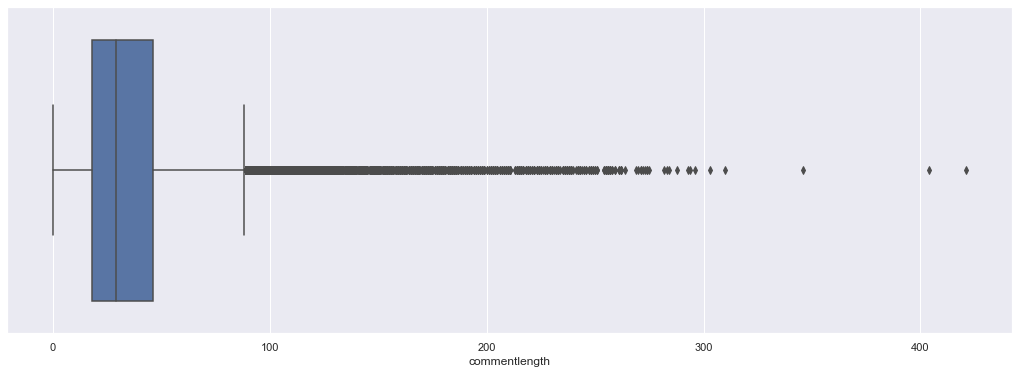

In [151]:
#Author: Prashant Mohit
print(reviews['commentlength'].describe())
print()

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(reviews['commentlength'])

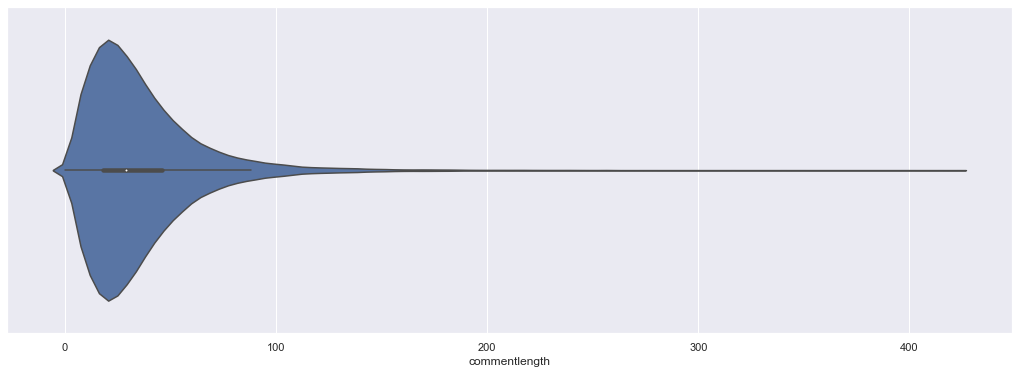

In [152]:
#Author: Prashant Mohit
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(reviews['commentlength'])

### Univariate Analysis of superhost

0    52348
1    32483
Name: host_is_superhost, dtype: int64



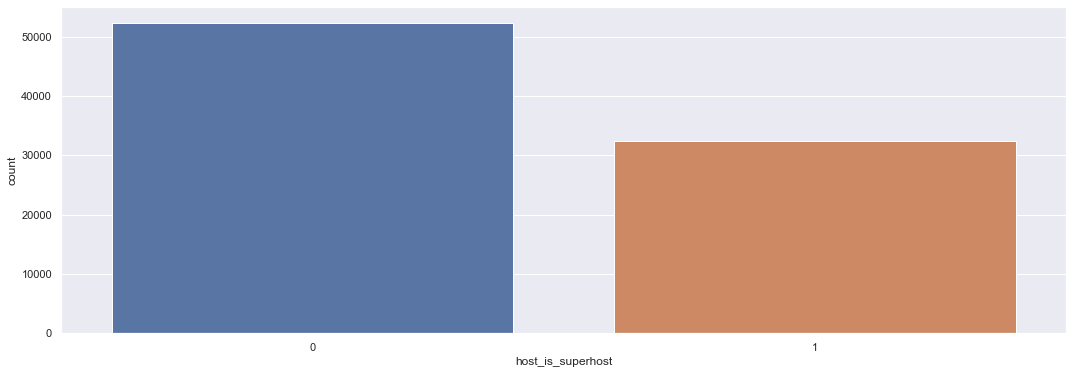

In [153]:
#Author: Prashant Mohit
print(reviews['host_is_superhost'].value_counts())
print()

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.countplot(reviews['host_is_superhost'])

### Univariate analysis of listing_id frequency in reviews

In [154]:
#Author: Prashant Mohit
reviews['listing_id'].value_counts()

208356     474
365550     466
25002      404
47196      353
63308      320
          ... 
5992645      1
9465815      1
2875975      1
7873208      1
6808970      1
Name: listing_id, Length: 3191, dtype: int64

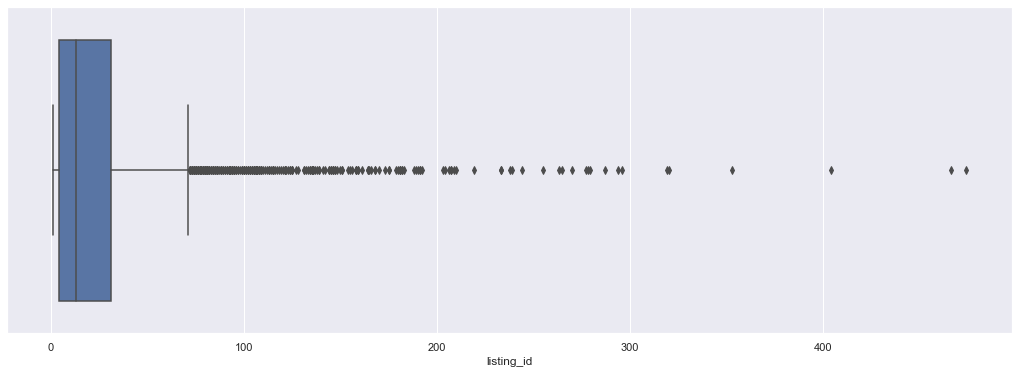

In [155]:
#Author: Prashant Mohit
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(reviews['listing_id'].value_counts())

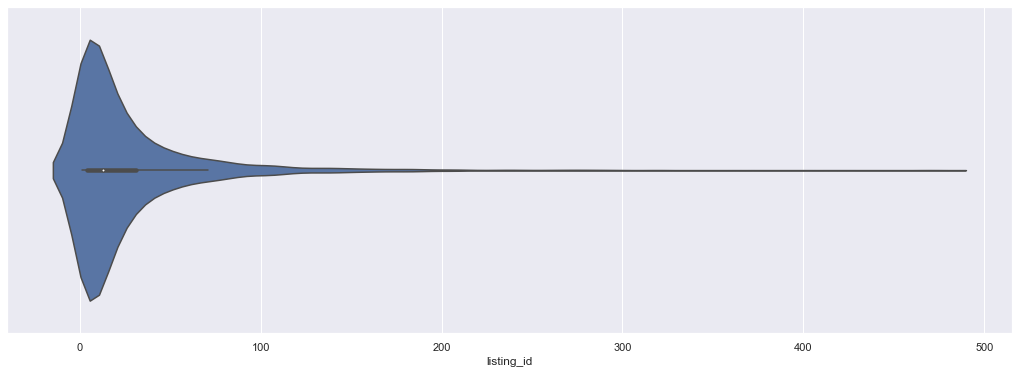

In [156]:
#Author: Prashant Mohit
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(reviews['listing_id'].value_counts())

### Bivariate analysis of superhost vs. commentlength


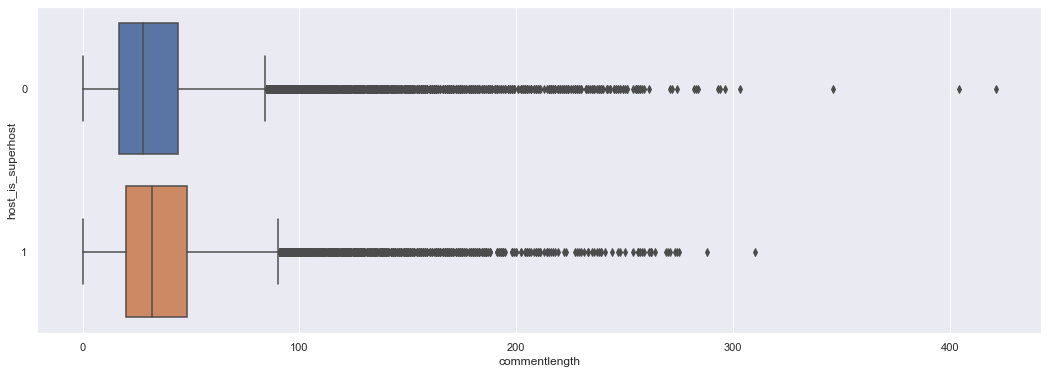

In [158]:
#Author: Prashant Mohit
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(data=reviews, x='commentlength', y='host_is_superhost', orient='h')

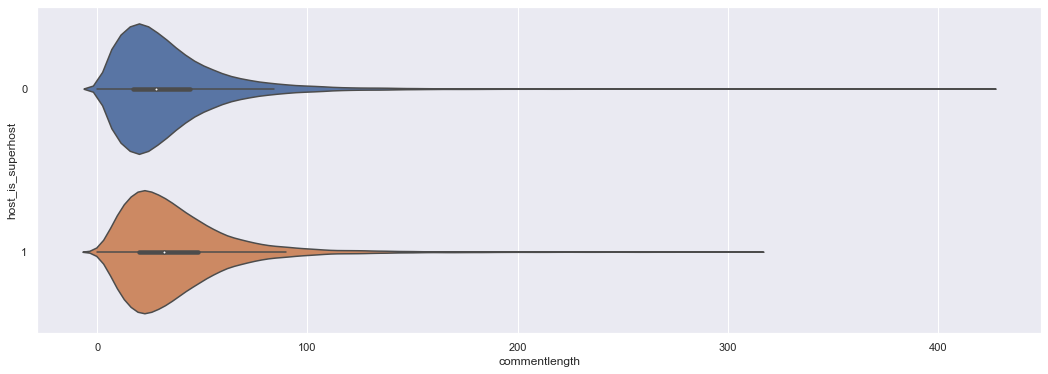

In [159]:
#Author: Prashant Mohit
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(data=reviews, x='commentlength', y='host_is_superhost', orient='h')

There is very little difference in the distributions so far, so the analysis will be carried further.

### Bivariate analysis of superhost vs. listing_id frequency

In [250]:
#Author: Prashant Mohit
#Note that column listing_id is actually the frequency count of the id

freq=reviews['listing_id'].value_counts().to_frame()
freq.reset_index(inplace=True) 


freq=freq.join(listings[['listing_id','host_is_superhost']].set_index('listing_id'), on='index')

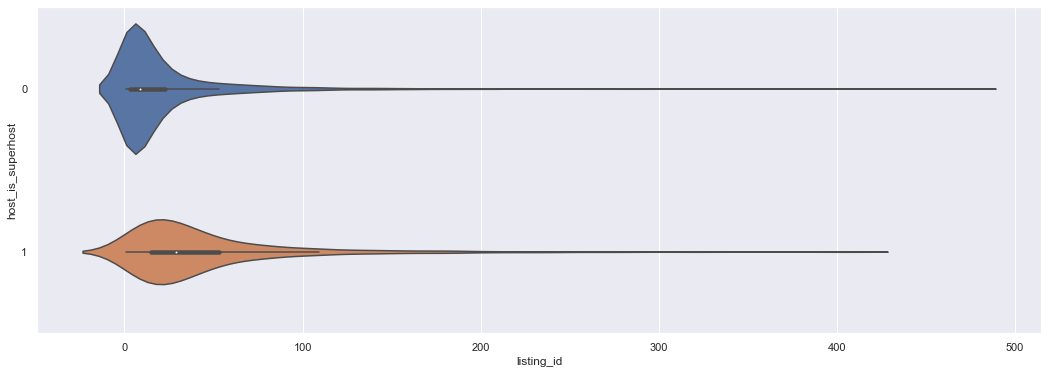

In [251]:
#Author: Prashant Mohit
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(data=freq, x='listing_id', y='host_is_superhost', orient='h')

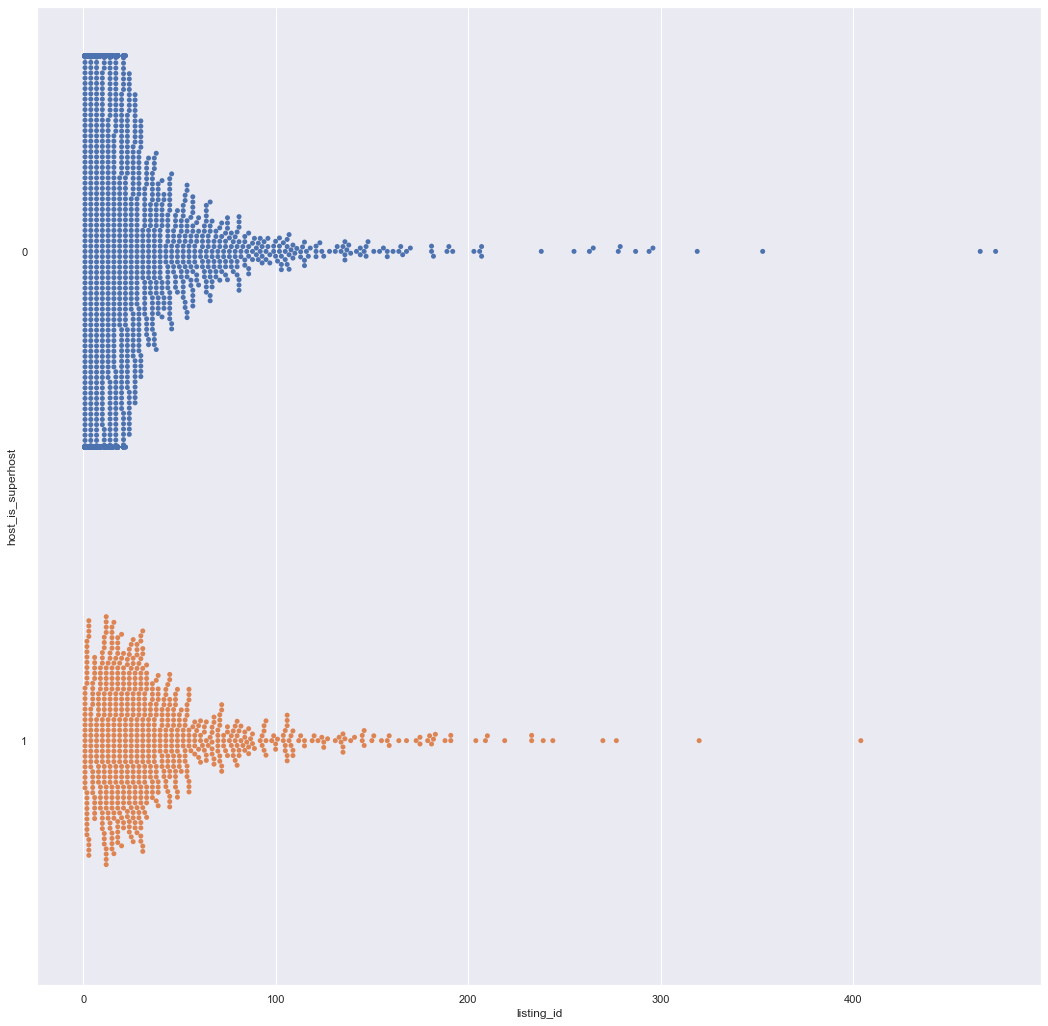

In [163]:
#Author: Prashant Mohit
f, axes = plt.subplots(1, 1, figsize=(18, 18))
sb.swarmplot(data=freq, x='listing_id', y='host_is_superhost', orient='h')

As there is a significant difference in the distributions, it is likely that superhosts get longer reviews than regular hosts, making this an important variable in predicting whether or not a host is a superhost.

## Textual analysis with adapted TFIDF

### Creating the word vector

In [36]:
#Author: Prashant Mohit
#Create a word vector with all unique words from the review comments

#Takes ~3 hours to run

column_names=['word','0','1']

vec=pd.DataFrame(columns=column_names)

for i in range(len(reviews)):
    l=reviews.at[i,'cleancomments']
    target=reviews.at[i,'host_is_superhost']
    for x in l:
        if(x not in vec.values):
            row={'word': x, '0': 0, '1': 0}
            vec=vec.append(row, ignore_index=True)
    
print(len(vec))
vec.head()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
49068


,word,0,1
0,cute,0,0
1,cozy,0,0
2,place,0,0
3,perfect,0,0
4,location,0,0


In [45]:
#Save file to reduce read time for following executions

#vec.to_csv('word_vector.csv',index=False)

In [46]:
#Author: Prashant Mohit
#Load file to reduce read time for following executions

vec=pd.read_csv('word_vector.csv')
vec=vec.set_index('word')

In [86]:
#Author: Prashant Mohit
#How frequent a certain words in superhost listings vs regular listings

#Takes ~3 hours to run

error=[]

for i in range(len(reviews)):
    try:
        l=reviews.at[i,'cleancomments']
        target=reviews.at[i,'host_is_superhost']
        for x in l:
            if(target==1):
                vec.at[x,'1']+=1
            else:
                vec.at[x,'0']+=1
        if(i%100==1):
            print(i)
    except:
        error.append(i)

1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
4301
4401
4501
4601
4701
4801
4901
5001
5101
5201
5301
5401
5501
5601
5701
5801
5901
6001
6101
6201
6301
6401
6501
6601
6701
6801
6901
7001
7101
7201
7301
7401
7501
7601
7701
7801
7901
8001
8101
8201
8301
8401
8501
8601
8701
8801
8901
9001
9101
9201
9301
9401
9501
9601
9701
9801
9901
10001
10101
10201
10301
10401
10501
10601
10701
10801
10901
11001
11101
11201
11301
11401
11501
11601
11701
11801
11901
12001
12101
12201
12301
12401
12501
12601
12701
12801
12901
13001
13101
13201
13301
13401
13501
13601
13701
13801
13901
14001
14101
14201
14301
14401
14501
14601
14701
14801
14901
15001
15101
15201
15301
15401
15501
15601
15701
15801
15901
16001
16101
16201
16301
16401
16501
16601
16701
16801
16901
17001
17101
17201
17301
17401
17501
17601
17701
17801
17901
18001
18101
18201
18301
18401
18

In [88]:
#Author: Prashant Mohit
#Reset index for convenience

vec.reset_index(inplace=True)

In [109]:
#Author: Prashant Mohit
print(error)

[33132, 33834, 49382, 49383, 49385, 49386, 49387, 49388, 49389, 49390, 49391, 49392, 49393, 49394, 49396, 49397, 49398, 49399, 49400, 49401, 49402, 49404, 49406, 49407, 49408, 49409, 49410, 49411, 49412, 49413, 49414, 49415, 49416, 49417, 49418, 49420, 49421, 49422, 49423, 49424, 49425, 49427, 49428, 49429, 49431, 49433, 49434, 49435, 49436, 49437, 49438, 49439, 49440, 49442, 49443, 49444, 49445, 49446, 49447, 49448, 49449, 49450, 49451, 49452, 49454, 49455, 49456, 49457, 49458, 49459, 49460, 49461, 49462, 49464, 49465, 49466, 49468, 49469, 49470, 49471, 49472, 49473, 49474, 49475, 49476, 49477, 49478, 49479, 49480, 49481, 49482, 49483, 49484, 49485, 49487, 49488, 49489, 49490, 49491, 49492, 49493, 49494, 49497, 49498, 49500, 49501, 49502, 49503, 49504, 49505, 49506, 49507, 49508, 49509, 49512, 49513, 49514, 49515, 49516, 49517, 49518, 49519, 49521, 49522, 49527, 49528, 49530, 49531, 49532, 49534, 49537, 49538, 49539, 49540, 49541, 49542, 49543, 49544, 49545, 49546, 49547, 49548, 49549

In [90]:
#Save file to reduce read time for following executions

#vec.to_csv('word_vector.csv',index=False)

In [164]:
#Author: Prashant Mohit
#Load file to reduce read time for following executions

vec=pd.read_csv('word_vector.csv')

In [165]:
#Author: Prashant Mohit
#Most frequently used words in reviews

vec['total']=vec['0']+vec['1']

vec.sort_values(by='total',ascending=False).head(50)

,word,0,1,total
7,great,52401,32780,85181
42,stay,42993,30159,73152
2,place,43290,26659,69949
25,seattle,32492,23563,56055
129,'s,32614,21157,53771
102,clean,25166,15774,40940
4,location,25908,14430,40338
90,host,23457,16682,40139
116,would,22729,14961,37690
44,apartment,22826,13241,36067


In [166]:
#Author: Prashant Mohit
#Least frequently used words in reviews

vec.sort_values(by='total',ascending=True).head(50)

,word,0,1,total
29227,NaN,0,0,0
36174,generous…,0,0,0
36175,emjoy,0,0,0
36176,outlander,0,0,0
36177,kimberlee,0,0,0
36178,delphine-,0,0,0
36183,specializing,0,0,0
36184,tea/coffee/cereal,0,0,0
36186,'my,0,0,0
36187,walk/jog/bike,0,0,0


### Clean word vector

Remove words that contain little information (i.e. word with length<3, words used extremely infrequently, words beginning with apostrophe).

In [167]:
#Author: Prashant Mohit
#Remove words used infrequently

vec.drop(vec[(vec['0']<=1) & (vec['1']<=1)].index,inplace=True,axis=0)

vec.reset_index(inplace=True) 
vec=vec.drop(columns=['index'])

len(vec)

31960

In [168]:
#Author: Prashant Mohit
#Remove words with certain punctuation

error=[]

for i in range(len(vec)):
    try:
        mark=False
        if(vec.at[i,'word'][0]=='\'' or vec.at[i,'word'][-1]=='\''):
            mark=True
        if('.' in vec.at[i,'word']):
            mark=True
        if('\"' in vec.at[i,'word']):
            mark=True
        if('.' in vec.at[i,'word']):
            mark=True
        if(vec.at[i,'word'][0]=='-' or vec.at[i,'word'][-1]=='-'):
            mark=True
        if('/' in vec.at[i,'word']):
            mark=True

        if(mark):
            error.append(i)
    except:
        #error.append(i)
        pass
    
vec.drop(vec.index[error], inplace=True)
vec.reset_index(inplace=True) 
vec=vec.drop(columns=['index'])

len(vec)

28308

In [169]:
#Author: Prashant Mohit
#Remove all numbers from the vector

error=[]

numbers=['0','1','2','3','4','5','6','7','8','9']

for i in range(len(vec)):
    try:
        mark=False
        for x in numbers:
            if(x in vec.at[i,'word']):
                mark=True
        if(mark):
            error.append(i)
    except:
        #error.append(i)
        pass

vec.drop(vec.index[error], inplace=True)
vec.reset_index(inplace=True) 
vec=vec.drop(columns=['index'])

len(vec)

27312

In [170]:
#Author: Prashant Mohit
#Drop specific value

vec.drop(vec.index[47], inplace=True)
vec.reset_index(inplace=True) 
vec=vec.drop(columns=['index'])

In [171]:
#Author: Prashant Mohit
vec.sort_values(by='total',ascending=False).head(50)

,word,0,1,total
7,great,52401,32780,85181
42,stay,42993,30159,73152
2,place,43290,26659,69949
25,seattle,32492,23563,56055
98,clean,25166,15774,40940
4,location,25908,14430,40338
87,host,23457,16682,40139
111,would,22729,14961,37690
44,apartment,22826,13241,36067
109,comfortable,20831,14628,35459


In [172]:
#Author: Prashant Mohit
#Remove all names from the vector

names=pd.DataFrame(listings['host_name'].unique())

for i in range(len(names)):
    names.at[i,0]=str(names.at[i,0]).lower()
    
error=[]

l=names[0].unique().tolist()

for i in range(len(vec)):
    word=str(vec.at[i,'word'])
    if(word in l):
        error.append(i)
        
vec.drop(vec.index[error], inplace=True)
vec.reset_index(inplace=True) 
vec=vec.drop(columns=['index'])

len(vec)

26273

In [173]:
#Author: Prashant Mohit
vec.head(50)

,word,0,1,total
0,cute,3000,1959,4959
1,cozy,6031,4682,10713
2,place,43290,26659,69949
3,perfect,13037,9630,22667
4,location,25908,14430,40338
5,everything,15928,11645,27573
6,great,52401,32780,85181
7,room,20013,11132,31145
8,central,1351,699,2050
9,beautiful,7073,6713,13786


### Score Words

A word would have a higher score if more information can be gained from it.

|Score| is logarithmically proportional to the difference between superhost occurrence ('1') and regular occurrence ('0').

|Score| for words that are more frequent in superhosts will need to be scaled and awarded much more than regular hosts as the number of words where '1' is greater than '0' is low.

In [174]:
#Author: Prashant Mohit
vec['score']=0.0

for i in range(len(vec)):
    yes=vec.at[i,'1']
    no=vec.at[i,'0']
    vec.at[i,'score']=-(math.log(0.5+no/(yes+no))**3)*math.log(0.5+abs(yes-no))

In [175]:
#Author: Prashant Mohit
vec.sort_values(by='score',ascending=True).head(50)

,word,0,1,total,score
4765,jaq,1023,0,1023,-0.462014
16805,mack,307,0,307,-0.381856
14337,prez,295,0,295,-0.379202
10582,saul,332,2,334,-0.375333
21846,joey,233,0,233,-0.363505
11195,lene,212,0,212,-0.357223
14340,cherie,191,0,191,-0.350287
12664,susy,190,0,190,-0.349938
15396,neha,186,0,186,-0.348523
23077,celine,166,0,166,-0.340962


In [176]:
#Author: Prashant Mohit
vec.sort_values(by='score',ascending=False).head(50)

,word,0,1,total,score
19836,abil,0,382,382,1.980407
6412,ruben,0,293,293,1.892205
18107,corinne,0,289,289,1.887635
23557,wagon,0,268,268,1.862557
9558,roberta,2,323,325,1.822550
25959,patti,0,216,216,1.790870
25655,julius,0,179,179,1.728456
19055,akiko,0,175,175,1.720951
3374,cory,3,277,280,1.703520
22234,nelda,0,138,138,1.642101


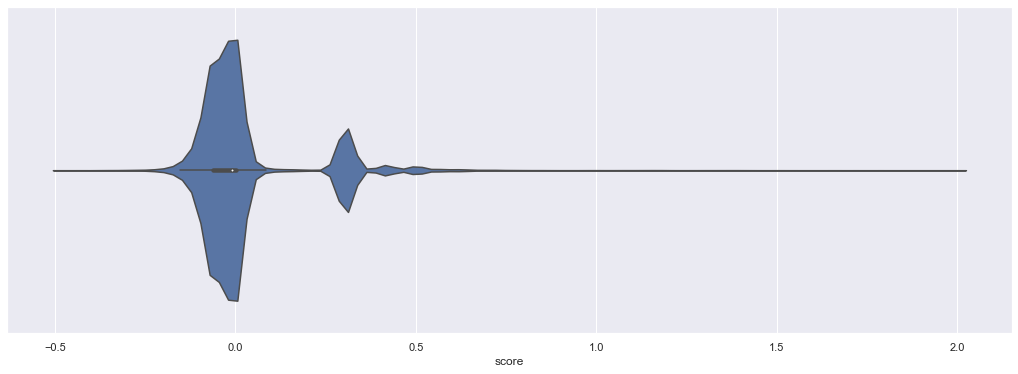

In [197]:
#Author: Prashant Mohit
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(vec['score'])

There is an obvious bias in the text data, given that there are still some names that could not be removed.

These will need to be removed manually to clean the vector completely.

## Scoring Reviews

In [177]:
#Author: Prashant Mohit
reviews.head()

,listing_id,id,date,reviewer_id,cleancomments,commentlength,host_is_superhost
0,7202016,38917982,"[2015, 07]",28943674,"[cute, cozy, place, perfect, location, everyth...",6,0
1,7202016,39087409,"[2015, 07]",32440555,"[kelly, great, room, central, location, beauti...",40,0
2,7202016,39820030,"[2015, 07]",37722850,"[spacious, apartment, great, neighborhood, kin...",34,0
3,7202016,40813543,"[2015, 08]",33671805,"[close, seattle, center, offer, ballet, theate...",28,0
4,7202016,41986501,"[2015, 08]",34959538,"[kelly, great, host, accommodating, great, nei...",27,0


In [178]:
#Author: Prashant Mohit
vec2=vec.set_index('word')
reviews['score']=0.0

for i in range(len(reviews)):
    l=reviews.at[i,'cleancomments']
    for x in l:
        try:
            reviews.at[i,'score']+=vec2.at[x,'score']
        except:
            continue
    if(i%1000==0):
        print(i)
    
reviews.head()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000


,listing_id,id,date,reviewer_id,cleancomments,commentlength,host_is_superhost,score
0,7202016,38917982,"[2015, 07]",28943674,"[cute, cozy, place, perfect, location, everyth...",6,0,-0.050922
1,7202016,39087409,"[2015, 07]",32440555,"[kelly, great, room, central, location, beauti...",40,0,-0.607278
2,7202016,39820030,"[2015, 07]",37722850,"[spacious, apartment, great, neighborhood, kin...",34,0,-0.440571
3,7202016,40813543,"[2015, 08]",33671805,"[close, seattle, center, offer, ballet, theate...",28,0,-0.285162
4,7202016,41986501,"[2015, 08]",34959538,"[kelly, great, host, accommodating, great, nei...",27,0,-0.273824


# Predict based on score

In [194]:
#Author: Prashant Mohit
reviews['predict']=0

for i in range(len(reviews)):
    if(reviews.at[i,'score']<0):
        reviews.at[i,'predict']=0
    else:
        reviews.at[i,'predict']=1
        
reviews.head()

,listing_id,id,date,reviewer_id,cleancomments,commentlength,host_is_superhost,score,predict
0,7202016,38917982,"[2015, 07]",28943674,"[cute, cozy, place, perfect, location, everyth...",6,0,-0.050922,0
1,7202016,39087409,"[2015, 07]",32440555,"[kelly, great, room, central, location, beauti...",40,0,-0.607278,0
2,7202016,39820030,"[2015, 07]",37722850,"[spacious, apartment, great, neighborhood, kin...",34,0,-0.440571,0
3,7202016,40813543,"[2015, 08]",33671805,"[close, seattle, center, offer, ballet, theate...",28,0,-0.285162,0
4,7202016,41986501,"[2015, 08]",34959538,"[kelly, great, host, accommodating, great, nei...",27,0,-0.273824,0


In [195]:
#Author: Prashant Mohit
#Classification accuracy

ac=len(reviews[reviews['host_is_superhost']==reviews['predict']])

print("Accuracy : ", ac/len(reviews))

fp=len(reviews[(reviews['host_is_superhost']==0) & (reviews['predict']==1)])

print("False Positives : ", fp/len(reviews))

fn=len(reviews[(reviews['host_is_superhost']==1) & (reviews['predict']==0)])

print("False Negatives : ", fn/len(reviews))

tp=len(reviews[(reviews['host_is_superhost']==1) & (reviews['predict']==1)])

print("True Positives : ", tp/len(reviews))

tn=len(reviews[(reviews['host_is_superhost']==0) & (reviews['predict']==0)])

print("True Negatives : ", tn/len(reviews))

Accuracy :  0.6869069090308967
False Positives :  0.0032888920323938184
False Negatives :  0.30980419893670946
True Positives :  0.07311006589572208
True Negatives :  0.6137968431351747


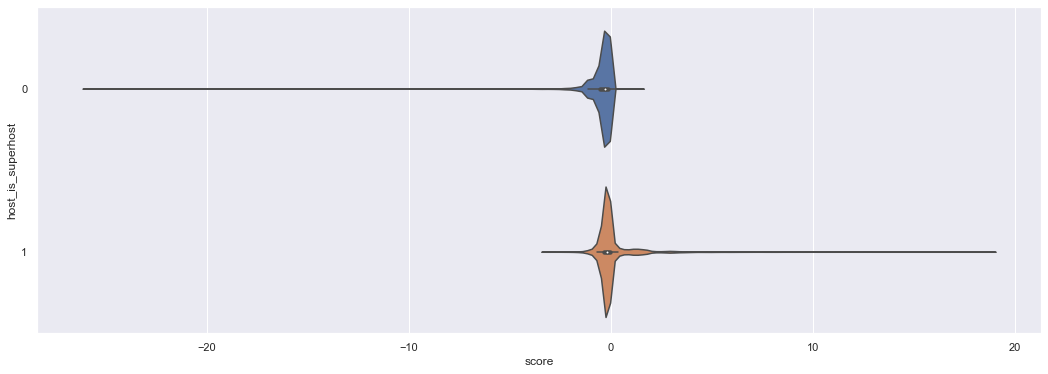

In [199]:
#Author: Prashant Mohit
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(data=reviews, x='score', y='host_is_superhost', orient='h')

From the overlap between the distributions, it is clear that there are still some bias words in the vector that are resulting in a large false negative rate.

For this reason, the vector will be reduced in the middle regions, where it is uncertain how much information a word provides.

# Prediction attempt #2

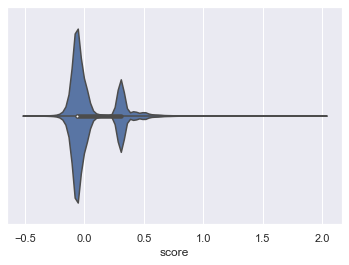

In [233]:
#Author: Prashant Mohit
vec2=vec[(vec['score']>0.0) | (vec['score']<-0.05)]

sb.violinplot(vec2['score'])

In [234]:
#Author: Prashant Mohit
vec3=vec2.set_index('word')
reviews['score2']=0.0

for i in range(len(reviews)):
    l=reviews.at[i,'cleancomments']
    for x in l:
        try:
            reviews.at[i,'score2']+=vec3.at[x,'score']
        except:
            continue
    if(i%1000==0):
        print(i)
    
reviews.head()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000


,listing_id,id,date,reviewer_id,cleancomments,commentlength,host_is_superhost,score,predict,score2,predic2,predict2
0,7202016,38917982,"[2015, 07]",28943674,"[cute, cozy, place, perfect, location, everyth...",6,0,-0.050922,0,0.000000,0,0
1,7202016,39087409,"[2015, 07]",32440555,"[kelly, great, room, central, location, beauti...",40,0,-0.607278,0,-0.330608,0,0
2,7202016,39820030,"[2015, 07]",37722850,"[spacious, apartment, great, neighborhood, kin...",34,0,-0.440571,0,-0.131268,0,0
3,7202016,40813543,"[2015, 08]",33671805,"[close, seattle, center, offer, ballet, theate...",28,0,-0.285162,0,-0.100261,0,0
4,7202016,41986501,"[2015, 08]",34959538,"[kelly, great, host, accommodating, great, nei...",27,0,-0.273824,0,0.000000,0,0


In [235]:
#Author: Prashant Mohit
reviews['predict2']=0

for i in range(len(reviews)):
    if(reviews.at[i,'score2']<=0):
        reviews.at[i,'predict2']=0
    else:
        reviews.at[i,'predict2']=1
        
reviews.head()

,listing_id,id,date,reviewer_id,cleancomments,commentlength,host_is_superhost,score,predict,score2,predic2,predict2
0,7202016,38917982,"[2015, 07]",28943674,"[cute, cozy, place, perfect, location, everyth...",6,0,-0.050922,0,0.000000,0,0
1,7202016,39087409,"[2015, 07]",32440555,"[kelly, great, room, central, location, beauti...",40,0,-0.607278,0,-0.330608,0,0
2,7202016,39820030,"[2015, 07]",37722850,"[spacious, apartment, great, neighborhood, kin...",34,0,-0.440571,0,-0.131268,0,0
3,7202016,40813543,"[2015, 08]",33671805,"[close, seattle, center, offer, ballet, theate...",28,0,-0.285162,0,-0.100261,0,0
4,7202016,41986501,"[2015, 08]",34959538,"[kelly, great, host, accommodating, great, nei...",27,0,-0.273824,0,0.000000,0,0


In [236]:
#Author: Prashant Mohit
#Classification accuracy

ac=len(reviews[reviews['host_is_superhost']==reviews['predict2']])

print("Accuracy : ", ac/len(reviews))

fp=len(reviews[(reviews['host_is_superhost']==0) & (reviews['predict2']==1)])

print("False Positives : ", fp/len(reviews))

fn=len(reviews[(reviews['host_is_superhost']==1) & (reviews['predict2']==0)])

print("False Negatives : ", fn/len(reviews))

tp=len(reviews[(reviews['host_is_superhost']==1) & (reviews['predict2']==1)])

print("True Positives : ", tp/len(reviews))

tn=len(reviews[(reviews['host_is_superhost']==0) & (reviews['predict2']==0)])

print("True Negatives : ", tn/len(reviews))

Accuracy :  0.7137367236033997
False Positives :  0.11929601207105893
False Negatives :  0.16696726432554138
True Positives :  0.21594700050689017
True Negatives :  0.49778972309650954


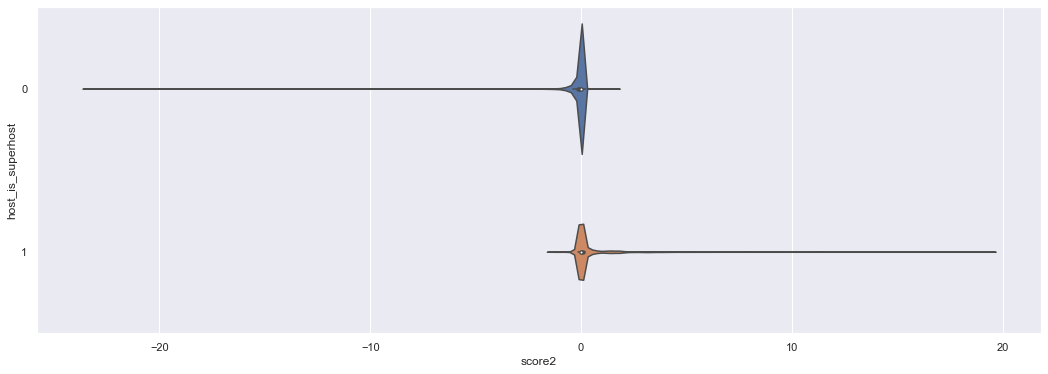

In [237]:
#Author: Prashant Mohit
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(data=reviews, x='score2', y='host_is_superhost', orient='h')

The prediction has been improved significantly this time with regards to the false negative rate, though the false positive rate has risen.

# Second Analysis

There still seems to be a discrepancy between the prediction and the actual data. The reason for this will be explored in the following section.

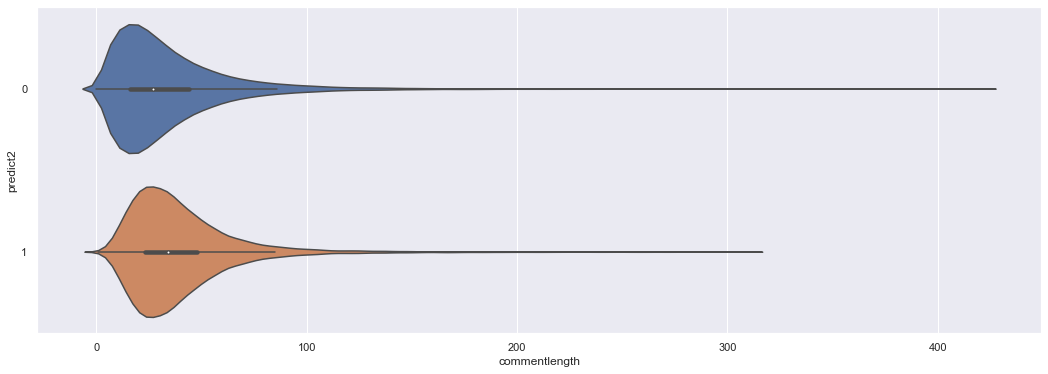

In [241]:
#Author: Prashant Mohit
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(data=reviews, x='commentlength', y='predict2', orient='h')

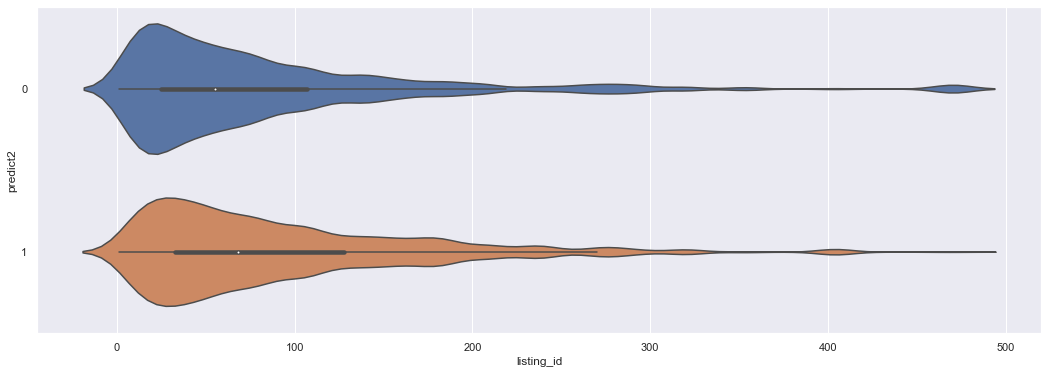

In [249]:
#Author: Prashant Mohit
freq=reviews['listing_id'].value_counts().to_frame()
freq.reset_index(inplace=True) 


freq=freq.join(reviews[['listing_id','predict2']].set_index('listing_id'), on='index')

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(data=freq, x='listing_id', y='predict2', orient='h')

As there is a discrepancy between these distributions and the original distributions, it is likely that these can be used as corrective measures for the overall prediction.

# Prediction attempt #3

In [262]:
#Author: Prashant Mohit
freq=reviews['listing_id'].value_counts().to_frame()
freq['reviewfreq']=freq['listing_id']

reviews=reviews.join(freq[['reviewfreq']],on='listing_id')

In [312]:
#Author: Prashant Mohit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y=reviews[['host_is_superhost']]

y['actual']=0
for i in range(len(y)):
    if(y.at[i,'host_is_superhost']==1):
        y.at[i,'actual']=1
    else:
        y.at[i,'actual']=0

X=reviews[['score2','commentlength','reviewfreq']]

X_train, X_test, y_train, y_test=train_test_split(X, y['actual'], test_size=0.1)

tree=RandomForestClassifier(max_depth=13)
tree.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [313]:
#Author: Prashant Mohit
print("Train Classification Accuracy : ", tree.score(X_train, y_train))
print("Test Classification Accuracy : ", tree.score(X_test, y_test))

Train Classification Accuracy :  0.7775551102204409
Test Classification Accuracy :  0.7615511551155115


In [314]:
#Author: Prashant Mohit
reviews['predict3']=tree.predict(X)

In [315]:
#Author: Prashant Mohit
#Classification accuracy

ac=len(reviews[reviews['host_is_superhost']==reviews['predict3']])

print("Accuracy : ", ac/len(reviews))

fp=len(reviews[(reviews['host_is_superhost']==0) & (reviews['predict3']==1)])

print("False Positives : ", fp/len(reviews))

fn=len(reviews[(reviews['host_is_superhost']==1) & (reviews['predict3']==0)])

print("False Negatives : ", fn/len(reviews))

tp=len(reviews[(reviews['host_is_superhost']==1) & (reviews['predict3']==1)])

print("True Positives : ", tp/len(reviews))

tn=len(reviews[(reviews['host_is_superhost']==0) & (reviews['predict3']==0)])

print("True Negatives : ", tn/len(reviews))

Accuracy :  0.7759545449187207
False Positives :  0.03789888130518325
False Negatives :  0.186146573776096
True Positives :  0.19676769105633554
True Negatives :  0.5791868538623852


This model has a higher classification accuracy on the data than the previous methods. However, the number of false negatives is higher in this model than in the previous one as the model aims to maximize the overall accuracy, which in this case is done by increasing the number of negatives predicted, which there are more of in the dataset.

### END ###